In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [53]:
df = pd.read_csv("quikr_car.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [54]:
print("Dataset Shape:", df.shape)

Dataset Shape: (892, 6)


In [55]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
                                      name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel  


In [56]:
print("\nInfo:\n")
print(df.info())


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
None


In [57]:
df=df[df["year"].str.isnumeric()]

In [58]:
df["year"]=df["year"].astype(int)

C:\Users\Alma Khan\AppData\Local\Temp\ipykernel_15928\616331101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"]=df["year"].astype(int)


In [59]:
df=df[df['Price']!='Ask For Price']

In [60]:
df["kms_driven"]=df["kms_driven"].str.split().str.get(0).str.replace(',','')

In [61]:
df=df[df['kms_driven'].str.isnumeric()]

In [62]:
df["kms_driven"]=df["kms_driven"].astype(int)

In [63]:
df=df[~df['fuel_type'].isna()]

In [64]:
df.shape

(816, 6)

In [65]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join('')

In [66]:
df=df.reset_index(drop=True)

In [67]:
df

,name,company,year,Price,kms_driven,fuel_type
0,HyundaiSantroXing,Hyundai,2007,"80,000",45000,Petrol
1,MahindraJeepCL550,Mahindra,2006,"4,25,000",40,Diesel
2,HyundaiGrandi10,Hyundai,2014,"3,25,000",28000,Petrol
3,FordEcoSportTitanium,Ford,2014,"5,75,000",36000,Diesel
4,FordFigo,Ford,2012,"1,75,000",41000,Diesel
...,...,...,...,...,...,...
811,MarutiSuzukiRitz,Maruti,2011,"2,70,000",50000,Petrol
812,TataIndicaV2,Tata,2009,"1,10,000",30000,Diesel
813,ToyotaCorollaAltis,Toyota,2009,"3,00,000",132000,Petrol
814,TataZestXM,Tata,2018,"2,60,000",27000,Diesel


In [68]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,816,816.000000,816
unique,254,25,NaN,272,NaN,3
top,MarutiSuzukiSwift,Maruti,NaN,"2,50,000",NaN,Petrol
freq,51,221,NaN,16,NaN,428
mean,NaN,NaN,2012.444853,NaN,46275.531863,NaN
std,NaN,NaN,4.002992,NaN,34297.428044,NaN
min,NaN,NaN,1995.000000,NaN,0.000000,NaN
25%,NaN,NaN,2010.000000,NaN,27000.000000,NaN
50%,NaN,NaN,2013.000000,NaN,41000.000000,NaN
75%,NaN,NaN,2015.000000,NaN,56818.500000,NaN


In [69]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [70]:
df.describe

<bound method NDFrame.describe of                      name   company  year   Price  kms_driven fuel_type
0       HyundaiSantroXing   Hyundai  2007   80000       45000    Petrol
1       MahindraJeepCL550  Mahindra  2006  425000          40    Diesel
2         HyundaiGrandi10   Hyundai  2014  325000       28000    Petrol
3    FordEcoSportTitanium      Ford  2014  575000       36000    Diesel
4                FordFigo      Ford  2012  175000       41000    Diesel
..                    ...       ...   ...     ...         ...       ...
811      MarutiSuzukiRitz    Maruti  2011  270000       50000    Petrol
812          TataIndicaV2      Tata  2009  110000       30000    Diesel
813    ToyotaCorollaAltis    Toyota  2009  300000      132000    Petrol
814            TataZestXM      Tata  2018  260000       27000    Diesel
815      MahindraQuantoC8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]>

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [72]:
df=df[df['Price']<6000000]

In [73]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

C:\Users\Alma Khan\AppData\Local\Temp\ipykernel_15928\475026656.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


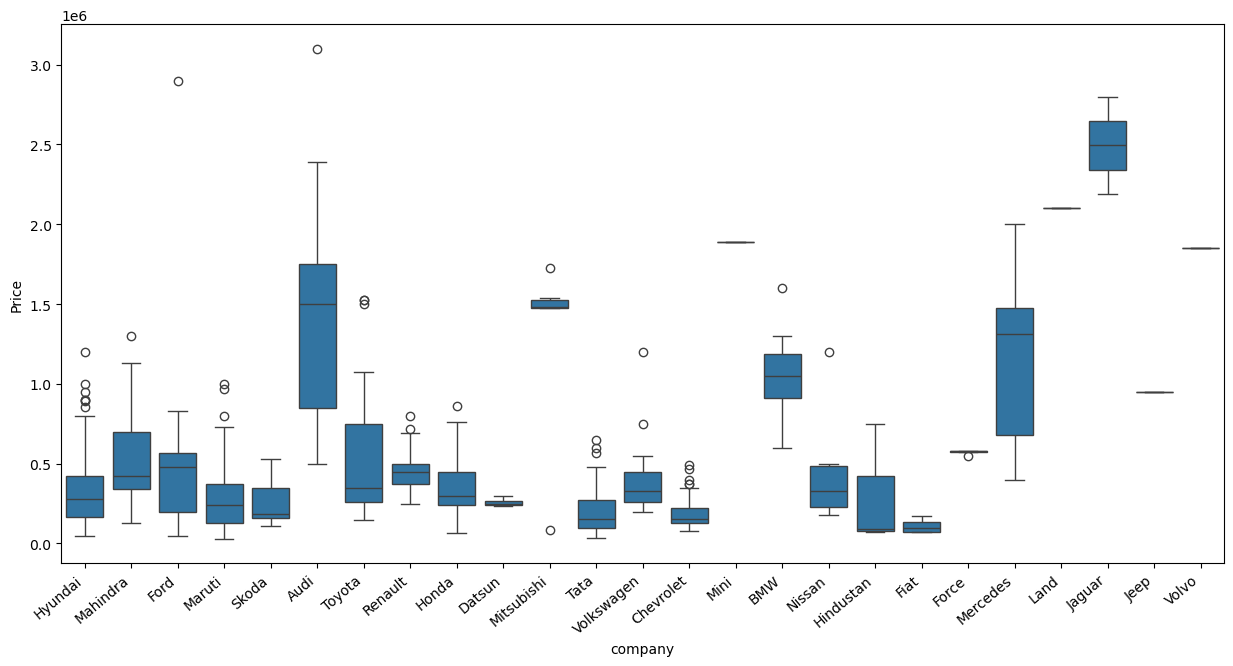

In [74]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\Alma Khan\AppData\Local\Temp\ipykernel_15928\1936613614.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


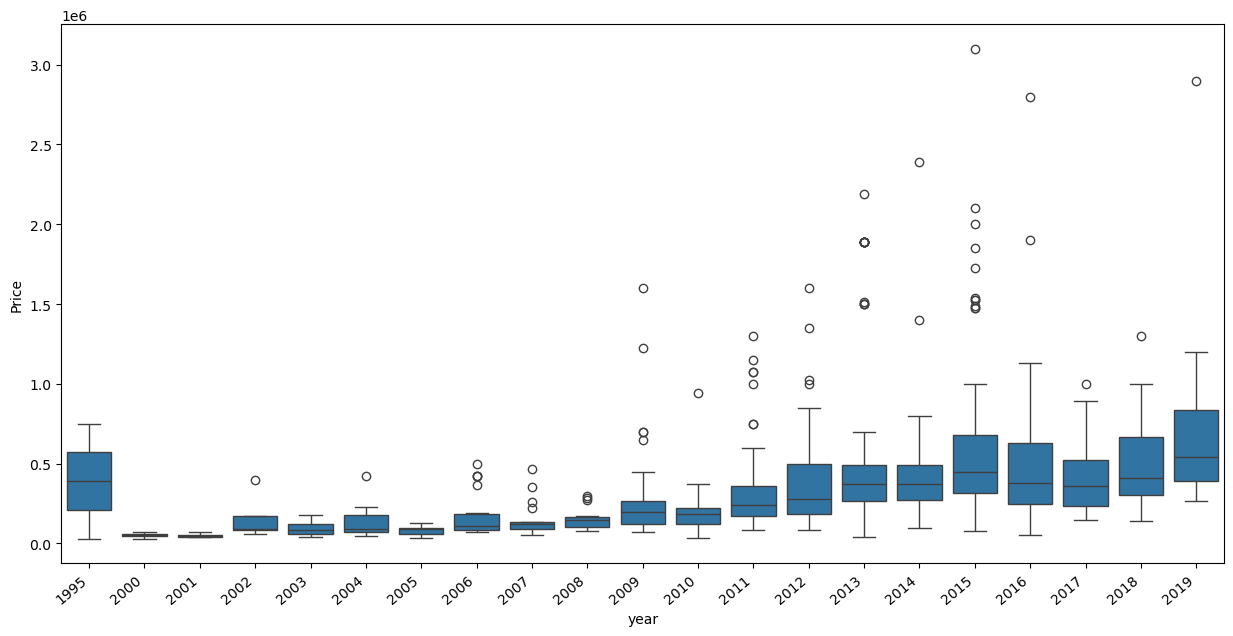

In [75]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\Alma Khan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma Khan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma Khan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma Khan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alma Khan\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 

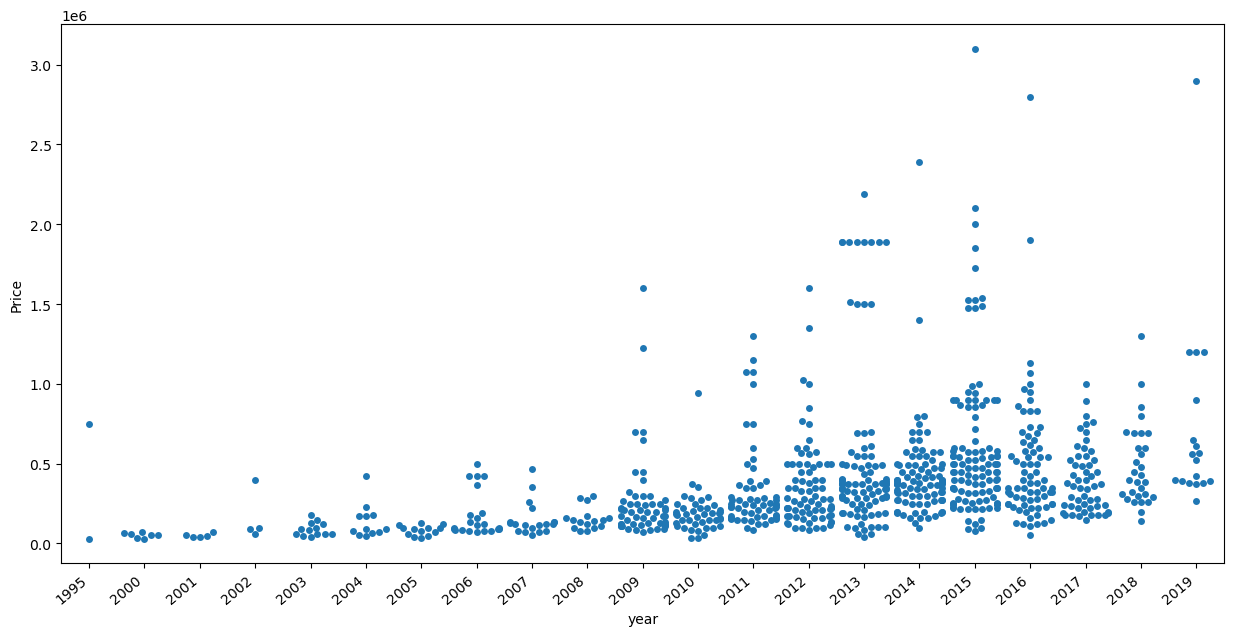

In [76]:
plt.subplots(figsize=(15,7))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [77]:
X = df[["company", "year", "kms_driven", "fuel_type"]]
y = df["Price"]


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first"), ["company", "fuel_type"])
    ],
    remainder="passthrough"
)

X_encoded = ct.fit_transform(X)

In [79]:
scaler = StandardScaler(with_mean=False)  # Fix for sparse matrix
X_scaled = scaler.fit_transform(X_encoded)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [81]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [82]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [83]:
y_pred = model.predict(x_test_poly)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance After Improvements:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance After Improvements:
R² Score: 0.6819
Mean Absolute Error (MAE): 143554.06
Mean Squared Error (MSE): 64770363204.92
Root Mean Squared Error (RMSE): 254500.22


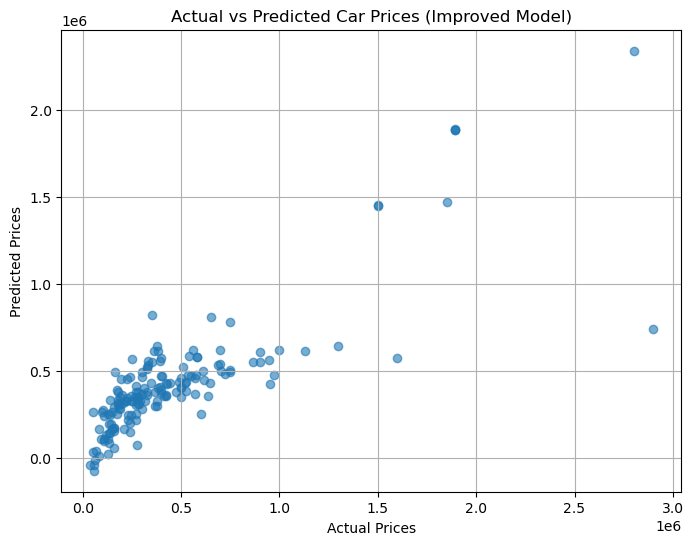

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices (Improved Model)")
plt.grid(True)
plt.show()
